In [46]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 2. Explore the dataset to understand its structure and content.

In [47]:
aqi = pd.read_csv('aqi.csv',encoding = "ISO-8859-1")

In [48]:
aqi.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [49]:
aqi.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [50]:
aqi.shape

(435742, 13)

In [51]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [52]:
aqi['date'] = pd.to_datetime(aqi['date'])

In [53]:
aqi.dtypes

stn_code                               object
sampling_date                          object
state                                  object
location                               object
agency                                 object
type                                   object
so2                                   float64
no2                                   float64
rspm                                  float64
spm                                   float64
location_monitoring_station            object
pm2_5                                 float64
date                           datetime64[ns]
dtype: object

In [54]:
aqi.describe()

,so2,no2,rspm,spm,pm2_5,date
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000,435735
mean,10.829414,25.809623,108.832784,220.783480,40.791467,2010-01-11 07:22:01.301249792
min,0.000000,0.000000,0.000000,0.000000,3.000000,1987-01-01 00:00:00
25%,5.000000,14.000000,56.000000,111.000000,24.000000,2007-07-03 00:00:00
50%,8.000000,22.000000,90.000000,187.000000,32.000000,2010-11-12 00:00:00
75%,13.700000,32.200000,142.000000,296.000000,46.000000,2013-09-07 12:00:00
max,909.000000,876.000000,6307.033333,3380.000000,504.000000,2015-12-31 00:00:00
std,11.177187,18.503086,74.872430,151.395457,30.832525,NaN


# 3. Identify the relevant variables for visualizing AQI trends, such as date, pollutant levels, and AQI values.

In [55]:
num_cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

for col in num_cols:
    aqi[col].fillna(aqi[col].mean(),inplace=True)

In [56]:
aqi.isna().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                                 0
no2                                 0
rspm                                0
spm                                 0
location_monitoring_station     27491
pm2_5                               0
date                                7
dtype: int64

In [57]:
aqi['year'] = aqi['date'].dt.year

In [58]:
aqi.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348,NaN,40.791467,1990-02-01,1990.0
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,108.832784,220.78348,NaN,40.791467,1990-02-01,1990.0
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348,NaN,40.791467,1990-02-01,1990.0
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348,NaN,40.791467,1990-03-01,1990.0
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,108.832784,220.78348,NaN,40.791467,1990-03-01,1990.0


# 4. Create line plots or time series plots to visualize the overall AQI trend over time.

In [59]:
no2= aqi.groupby('year').agg({'no2':'mean'})
so2= aqi.groupby('year').agg({'so2':'mean'})
pm10= aqi.groupby('year').agg({'rspm':'mean'})
spm= aqi.groupby('year').agg({'spm':'mean'})
pm2_5= aqi.groupby('year').agg({'pm2_5':'mean'})

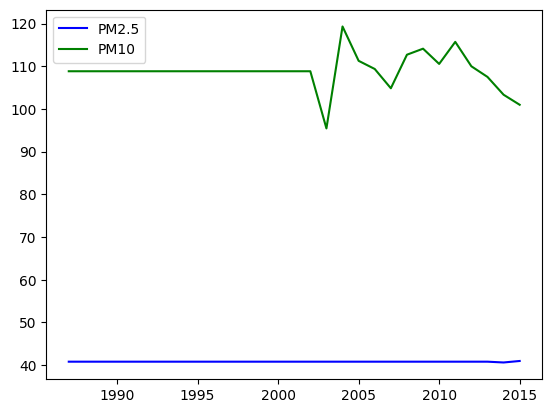

In [60]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))
plt.plot(pm2_5, label='PM2.5', color='blue')
plt.plot(pm10, label='PM10', color='green')
# plt.title('AQI Trend Over Time')
# plt.xlabel('Date')
# plt.ylabel('Pollutant Levels')
plt.legend()
# plt.grid(True)
# plt.show()

# 5.Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to visualize their trends over time.

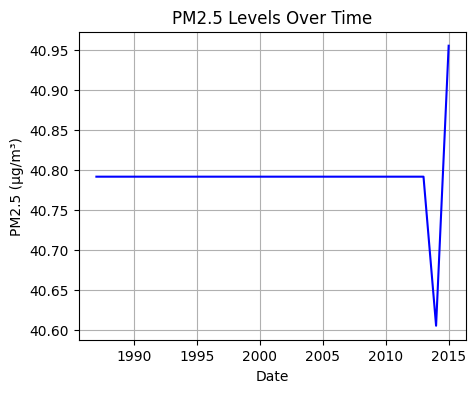

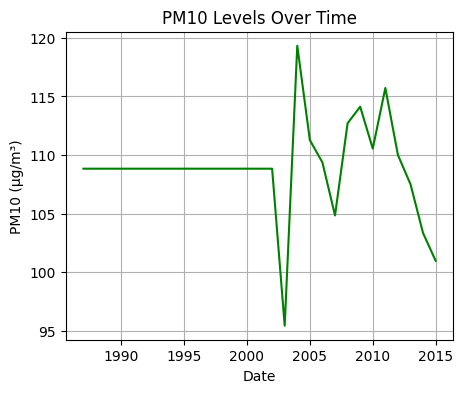

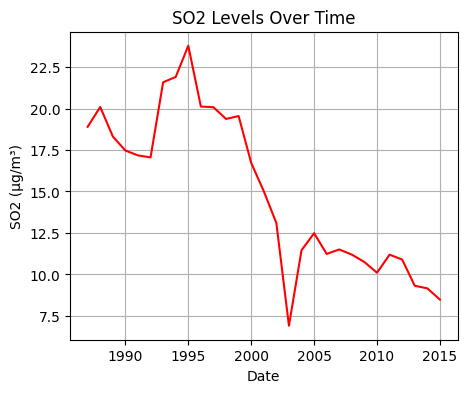

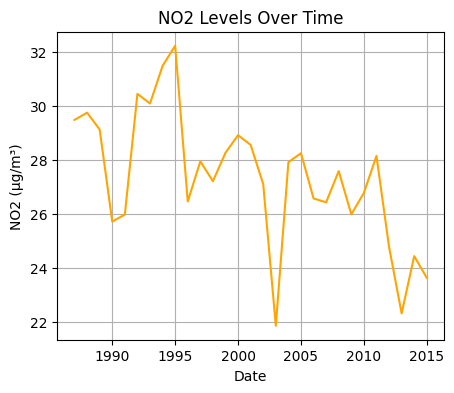

In [61]:
# PM2.5
plt.figure(figsize=(5,4))
plt.plot(pm2_5, label='PM2.5', color='blue')
plt.title('PM2.5 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()

# PM10
plt.figure(figsize=(5,4))
plt.plot(pm10, label='PM10', color='green')
plt.title('PM10 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('PM10 (µg/m³)')
plt.grid(True)
plt.show()

# SO2
plt.figure(figsize=(5,4))
plt.plot(so2, label='SO2', color='red')
plt.title('SO2 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('SO2 (µg/m³)')
plt.grid(True)
plt.show()

# NO2
plt.figure(figsize=(5,4))
plt.plot(no2, label='NO2', color='orange')
plt.title('NO2 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('NO2 (µg/m³)')
plt.grid(True)
plt.show()

# 6. Use bar plots or stacked bar plots to compare the AQI values across different dates or time periods.

In [62]:
spm.values.ravel()

array([278.40129017, 247.3535699 , 237.62027261, 242.30536151,
       241.39668864, 199.39217116, 226.20745496, 243.56870867,
       242.81573746, 248.24286444, 208.81199764, 239.3654718 ,
       230.35585147, 201.19553882, 229.17659639, 186.47698593,
       199.0159477 , 185.19599527, 231.58992334, 224.80183299,
       219.2537916 , 229.76704448, 234.41430547, 231.66828626,
       211.08773529, 220.7834796 , 209.57902241, 220.7834796 ,
       220.7834796 ])

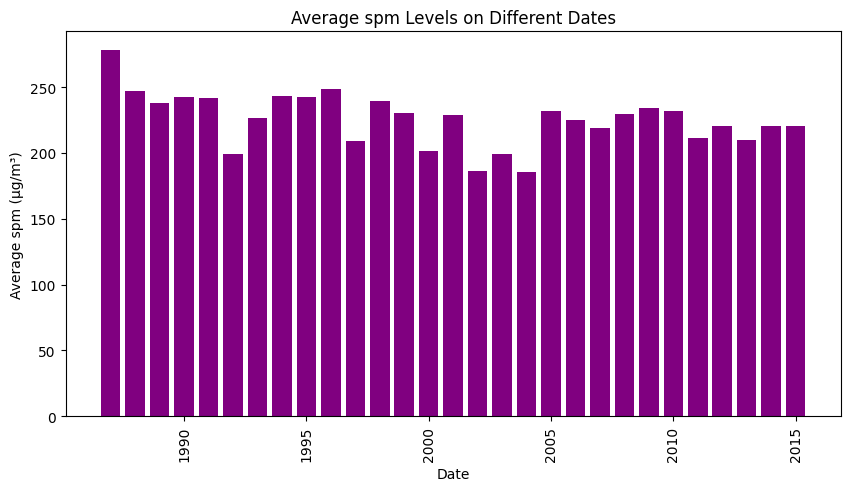

In [63]:
plt.figure(figsize=(10, 5))
plt.bar(spm.index,spm.values.ravel(),color='purple')
plt.title('Average spm Levels on Different Dates')
plt.xlabel('Date')
plt.ylabel('Average spm (µg/m³)')
plt.xticks(rotation=90)
plt.show()

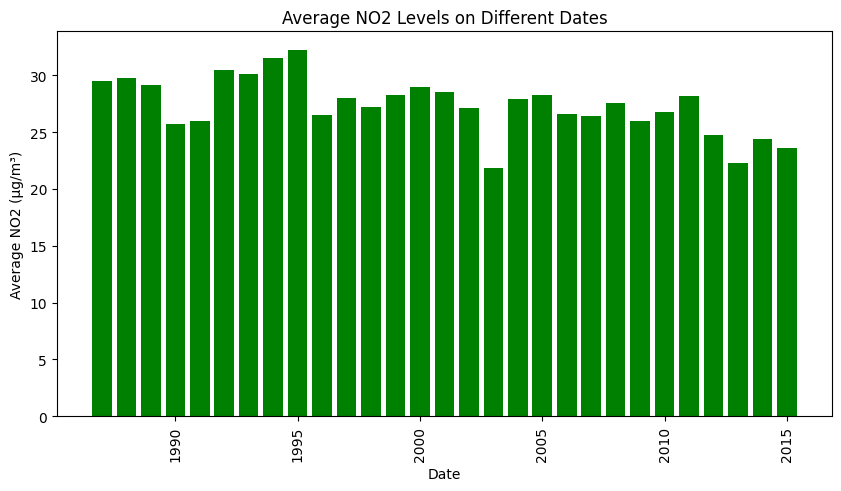

In [64]:
plt.figure(figsize=(10, 5))
plt.bar(no2.index,no2.values.ravel(),color='green')
plt.title('Average NO2 Levels on Different Dates')
plt.xlabel('Date')
plt.ylabel('Average NO2 (µg/m³)')
plt.xticks(rotation=90)
plt.show()

# 7.Create box plots or violin plots to analyze the distribution of AQI values for different pollutant categories.

In [65]:
import seaborn as sns

<Axes: >

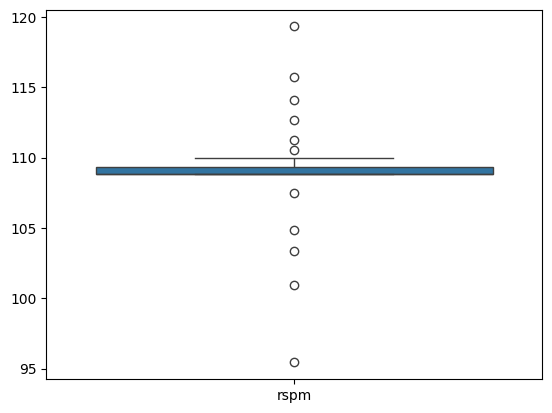

In [66]:
sns.boxplot(pm10)

<Axes: >

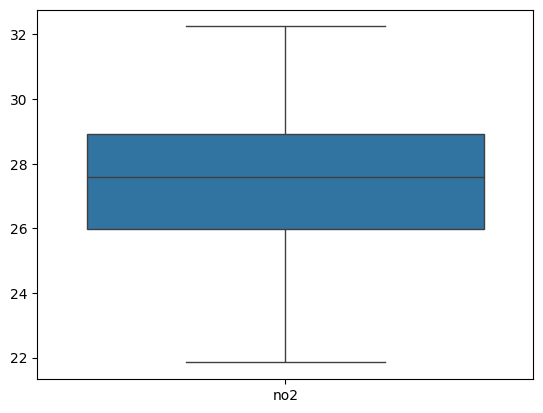

In [67]:
sns.boxplot(no2)

<Axes: >

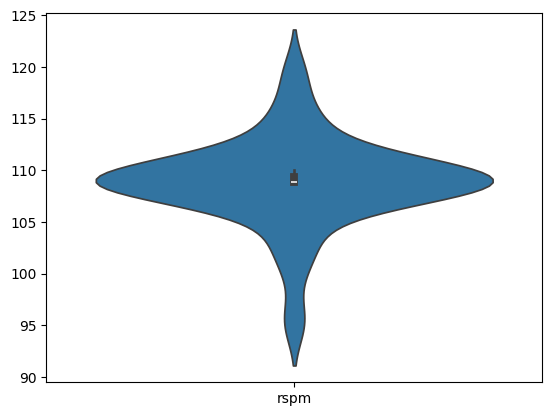

In [68]:
sns.violinplot(pm10)

# 8. Use scatter plots or bubble charts to explore the relationship between AQI values and pollutant levels.

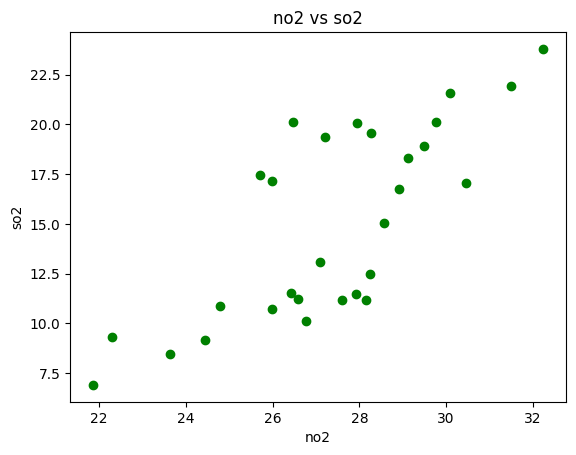

In [69]:
plt.scatter(no2.values,so2.values,color='green')
plt.xlabel('no2')
plt.ylabel('so2')
plt.title('no2 vs so2');